In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load your dataset
data = pd.read_excel('Data.xlsx')

In [3]:
data.describe()

,id_question,grade
count,458.000000,459.000000
mean,3.975983,1.052288
std,2.024325,0.978754
min,1.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,2.000000
75%,6.000000,2.000000
max,7.000000,2.000000


In [4]:
# Preprocessing
answers = data['stu_answer'].astype(str).tolist()
grades = data['grade'].tolist()
print(grades[:5])

[2, 2, 0, 1, 2]


In [5]:
# Tokenization and Padding
max_words = 150 # Maximum number of words to tokenize
max_seq_length = 20  # Maximum sequence length (adjust as needed)

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(answers)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(answers)
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [6]:
# Convert grades to categorical labels
num_classes = len(set(grades))
categorical_labels = to_categorical(grades, num_classes=num_classes)
print(categorical_labels[:5])


[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, categorical_labels, test_size=0.2, random_state=42)

In [8]:
# Define LSTM model
embedding_dim = 100  # Dimension of word embeddings

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_seq_length))
model.add(LSTM(units=128))
model.add(Dense(units=num_classes, activation='softmax'))

In [9]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs =8
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/8


6/6 [==============================] - 2s 108ms/step - loss: 1.0517 - accuracy: 0.4332 - val_loss: 0.9670 - val_accuracy: 0.3913
Epoch 2/8
6/6 [==============================] - 0s 21ms/step - loss: 0.8965 - accuracy: 0.4932 - val_loss: 0.8161 - val_accuracy: 0.4022
Epoch 3/8
6/6 [==============================] - 0s 22ms/step - loss: 0.8687 - accuracy: 0.5150 - val_loss: 0.7910 - val_accuracy: 0.4348
Epoch 4/8
6/6 [==============================] - 0s 22ms/step - loss: 0.8396 - accuracy: 0.5613 - val_loss: 0.8049 - val_accuracy: 0.4565
Epoch 5/8
6/6 [==============================] - 0s 26ms/step - loss: 0.8129 - accuracy: 0.6104 - val_loss: 0.7920 - val_accuracy: 0.4783
Epoch 6/8
6/6 [==============================] - 0s 34ms/step - loss: 0.7625 - accuracy: 0.6594 - val_loss: 0.6595 - val_accuracy: 0.6196
Epoch 7/8
6/6 [==============================] - 0s 23ms/step - loss: 0.6794 - accuracy: 0.6703 - val_loss: 0.5043 - val_accuracy: 0.7717
Epoch 8/8
6/6 [================

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

3/3 [==============================] - 0s 7ms/step - loss: 0.4348 - accuracy: 0.8152
Test loss: 0.43482527136802673
Test accuracy: 0.8152173757553101


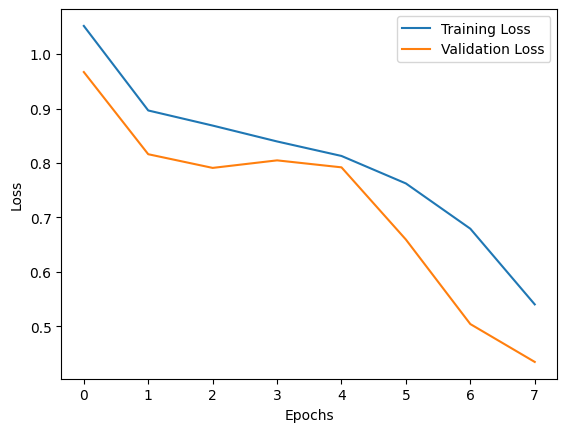

In [11]:
# Print the history of loss during training
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           15000     
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 132635 (518.11 KB)
Trainable params: 132635 (518.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
